In [1]:
import pandas as pd

ambasadors = pd.Series([
    'France', 
    'United States',
    'United States',
    'Germany',
    'Italy',
    'Japan',
    'Japan',
    'Russia', 
    'Russia'
] , index=['Enmanuel Macron', 'Boris Johnson', 'Joe Biden', 'Angela Merkel', 'Sergio Mattarella', 'Justin Trudeau', 'Yoshihide Suga', 'Vladimir Putin', 'Dmitry Medvedev'])

print(ambasadors)

Enmanuel Macron             France
Boris Johnson        United States
Joe Biden            United States
Angela Merkel              Germany
Sergio Mattarella            Italy
Justin Trudeau               Japan
Yoshihide Suga               Japan
Vladimir Putin              Russia
Dmitry Medvedev             Russia
dtype: object


Primero que todo tiene que definir lo que es un duplicado, para ello existen distintos métodos para poder indicarlo

In [10]:
ambasadors.duplicated(keep='first') # Mark duplicates as True except for the first occurrence.
ambasadors.duplicated(keep='last') # Mark duplicates as True except for the last occurrence.

print(ambasadors.drop_duplicates(keep='first'))# Remove duplicates except for the first occurrence.


Enmanuel Macron             France
Boris Johnson        United States
Angela Merkel              Germany
Sergio Mattarella            Italy
Justin Trudeau               Japan
Vladimir Putin              Russia
dtype: object


You can also look filtered by any specific parameters (column)

In [21]:
players = pd.DataFrame({
    'name': [
        'Lionel Messi',
        'Cristiano Ronaldo',
        'Neymar Jr',    
        'Lionel Messi',
        'Cristiano Ronaldo',
        'Neymar Jr',
        'Neymar Jr',
        'Neymar Jr',
        'Neymar Jr'
    ], 
    'date of birth': [
        '24 June 1987',
        '5 February 1985',
        '5 February 1992',
        '24 June 1987',
        '5 February 1985',
        '5 February 1992',
        '24 June 1987',
        '5 February 1985',
        '5 February 1992'
    ]
}, index=['Barcelona', 'Juventus', 'Paris Saint-Germain', 'Barcelona', 'Juventus', 'Paris Saint-Germain', 'Barcelona', 'Juventus', 'Paris Saint-Germain'])

print(players)
players.duplicated(subset=['date of birth'], keep='first') # Mark duplicates as True except for the first occurrence.

                                  name    date of birth
Barcelona                 Lionel Messi     24 June 1987
Juventus             Cristiano Ronaldo  5 February 1985
Paris Saint-Germain          Neymar Jr  5 February 1992
Barcelona                 Lionel Messi     24 June 1987
Juventus             Cristiano Ronaldo  5 February 1985
Paris Saint-Germain          Neymar Jr  5 February 1992
Barcelona                    Neymar Jr     24 June 1987
Juventus                     Neymar Jr  5 February 1985
Paris Saint-Germain          Neymar Jr  5 February 1992


Barcelona              False
Juventus               False
Paris Saint-Germain    False
Barcelona               True
Juventus                True
Paris Saint-Germain     True
Barcelona               True
Juventus                True
Paris Saint-Germain     True
dtype: bool

Subplotting and visualizations

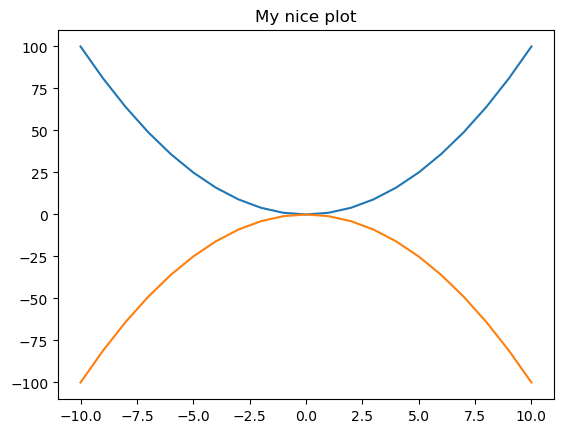

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
x = np.arange(-10, 11)

plt.title('My nice plot')
plt.plot(x, x ** 2) #
plt.plot(x, -1 * (x ** 2)) #This does the plot


Text(0, 0.5, '-X Squared')

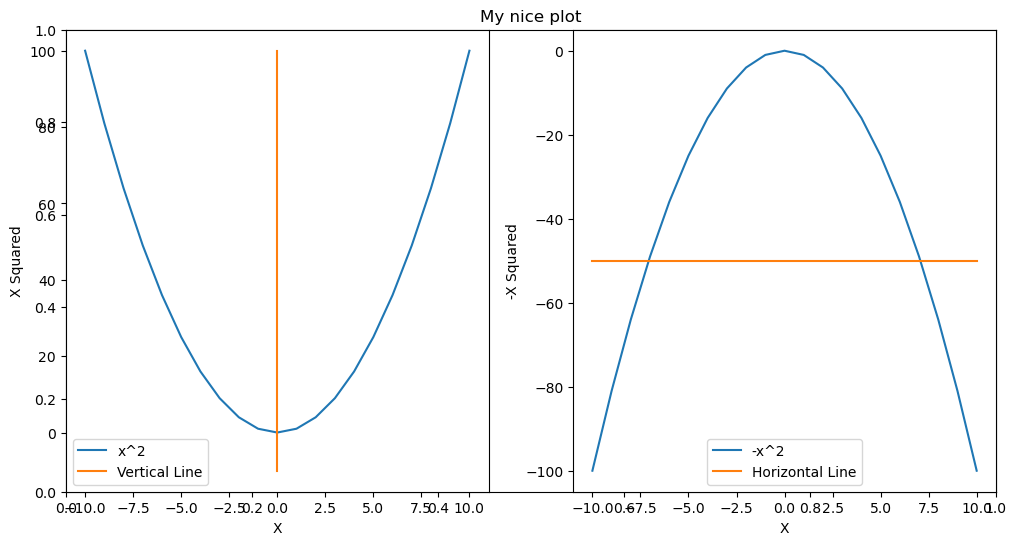

In [23]:
plt.figure(figsize=(12, 6)) # Set the size of the plot	
plt.title('My nice plot') # Set the title of the plot

plt.subplot(1, 2, 1) # Create a subplot with 1 row, 2 columns, and set the position to 1
plt.plot(x, x ** 2) # Plot x against x^2
plt.plot([0,0,0], [-10,0,100]) # Plot the line x=0
plt.legend(['x^2', 'Vertical Line']) # Set the legend
plt.xlabel('X') # Set the x-axis label
plt.ylabel('X Squared') # Set the y-axis label

plt.subplot(1, 2, 2) # Create a subplot with 1 row, 2 columns, and set the position to 2
plt.plot(x, -1 * (x ** 2)) # Plot x against -x^2
plt.plot([-10, 0, 10], [-50, -50, -50]) # Plot the line y=-50
plt.legend(['-x^2', 'Horizontal Line']) # Set the legend
plt.xlabel('X') # Set the x-axis label
plt.ylabel('-X Squared') # Set the y-axis label


Read CSV methods and TXT files

In [2]:
#native python
import pandas as pd
with open ('name_of_file', 'r') as file: # Open the file in read mode which is a 'r' parameter
    data = file.read()
    print(data)

#Once the file is opened, we can read its content as follows

with open('name_of_file', 'r') as file:
    for index, line in enumerate(file.readlines()):
        if (index < 10): 
            print(index, line)
    # Read the first 10 lines of the file, 


In [13]:

#Now, we'll read it using pandas parsing data
import pandas as pd
csv_url = 'https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv'
pd.read_csv(csv_url).head()

#We can define a na_values parameter with the values we want to be reognized as NaN
df = pd.read_csv(csv_url, header = None, na_values=['', '?', '-'])
df.head()


#

,0,1,2,3
0,Country Name,Country Code,Year,Value
1,Arab World,ARB,1968,25760683041.0857
2,Arab World,ARB,1969,28434203615.4829
3,Arab World,ARB,1970,31385499664.0672
4,Arab World,ARB,1971,36426909888.3928


Date parser using parse_dates parameter 

In [15]:
df = pd.read_csv(csv_url,
                 header=1,  # Skip the first row
                 na_values=['', '?', '-'],
                 names=['Timestamp', 'Price'],
                 dtype={'Price': 'float'},
                 parse_dates=[0])  # Parse the first column as a date)
df.head()

C:\Users\Luis\AppData\Local\Temp\ipykernel_10040\1532240567.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_url,


Timestamp         Price
Arab World ARB 1969-01-01  2.843420e+10
           ARB 1970-01-01  3.138550e+10
           ARB 1971-01-01  3.642691e+10
           ARB 1972-01-01  4.331606e+10
           ARB 1973-01-01  5.501839e+10

Reading data from realtional databases
ex. with sqllite3
this is nativa python

In [ ]:
#Create a connection to a SQL database
import sqlite3
conn = sqllite.connect('name_of_database.db')
cursor = conn.cursor() # Create a cursor
cursor.execute('SELECT * FROM table_name') # Execute a query
results = cursor.fetchall() # Fetch the query results
print(results) # Print the results